In [1]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import numpy as np
import datetime
import waterfall_chart

In [2]:
verra_df = pd.read_csv('../Data/VCU_Registry_Result_V2_5.2.22.csv',
                      parse_dates = ['Issuance Date', 'Retirement/Cancellation Date', 'Vintage Start', 'Vintage End'])

In [3]:
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details
0,2022-04-29,NaN,2020-01-11,2020-12-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
1,2022-04-29,NaN,2021-01-01,2021-08-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
2,2022-04-29,NaN,2020-08-28,2020-12-31,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
3,2022-04-29,NaN,2021-01-01,2021-09-30,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
4,2022-04-29,NaN,2016-01-01,2016-12-31,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-1...,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...,NaT,NaN,NaN,NaN


First, cleaning column names

In [4]:
#getting rid of spaces and slashes
verra_df.columns = verra_df.columns.str.replace("\/| |\.", '_', regex = True)
verra_df.columns = verra_df.columns.str.lower()

In [5]:
verra_df.columns

Index(['issuance_date', 'sustainable_development_goals', 'vintage_start',
       'vintage_end', 'id', 'name', 'country', 'project_type', 'methodology',
       'total_vintage_quantity', 'quantity_issued', 'serial_number',
       'additional_certifications', 'retirement_cancellation_date',
       'retirement_beneficiary', 'retirement_reason', 'retirement_details'],
      dtype='object')

In [6]:
verra_df.loc[verra_df['quantity_issued'].isnull()]

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details


In [7]:
verra_df = verra_df.loc[verra_df['quantity_issued'].notnull()]

In [8]:
verra_df.sort_values(by='quantity_issued',
                    ascending=False,
                    inplace=True)

In [9]:
verra_df.head()

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details
49538,2019-05-21,NaN,2016-01-01,2017-12-31,1566,REDD+ Project Resguardo Indigena Unificado Sel...,Colombia,Agriculture Forestry and Other Land Use,VM0007,6404775,5250000,6709-333713222-338963221-VCU-048-APX-CO-14-156...,NaN,2019-05-21,PRIMAX COLOMBIA S.A identificada con Nit: 860....,Compliance Requirements,PRIMAX COLOMBIA S.A identificada con Nit: 860....
3735,2021-09-20,NaN,2016-01-01,2019-12-31,1340,Bale Mountains Eco-region REDD+ project,Ethiopia,Agriculture Forestry and Other Land Use,VM0015,4438780,2850000,11279-306091154-308941153-VCS-VCU-1507-VER-ET-...,CCB-Gold,NaT,NaN,NaN,NaN
23210,2020-12-30,NaN,2019-01-01,2019-12-31,1742,Hydroelectric Project in Kinnaur District in H...,India,Energy industries (renewable/non-renewable sou...,ACM0002,3683633,2720135,9375-88987455-91707589-VCS-VCU-997-VER-IN-1-17...,NaN,NaT,NaN,NaN,NaN
54209,2018-06-12,NaN,2010-01-11,2015-10-31,1477,Katingan Peatland Restoration and Conservation...,Indonesia,Agriculture Forestry and Other Land Use,VM0007,14165124,2539496,6250-289727777-292267272-VCU-006-APX-ID-14-147...,CCB-Gold,NaT,NaN,NaN,NaN
269,2022-03-31,NaN,2017-01-01,2017-12-31,934,The Mai Ndombe REDD+ Project,"Congo, The Democratic Republic of The",Agriculture Forestry and Other Land Use,VM0009,4574504,2350000,12787-437069438-439419437-VCS-VCU-259-VER-CD-1...,CCB-Biodiversity Gold; CCB-Climate Gold,NaT,NaN,NaN,NaN


In [10]:
verra_df['issuance_year'] = pd.DatetimeIndex(verra_df['issuance_date']).year
verra_df['retirement_year'] = pd.DatetimeIndex(verra_df['retirement_cancellation_date']).year

In [11]:
verra_df['retirement_beneficiary'] = verra_df['retirement_beneficiary'].str.lower()

In [12]:
verra_df.head(2)

,issuance_date,sustainable_development_goals,vintage_start,vintage_end,id,name,country,project_type,methodology,total_vintage_quantity,quantity_issued,serial_number,additional_certifications,retirement_cancellation_date,retirement_beneficiary,retirement_reason,retirement_details,issuance_year,retirement_year
49538,2019-05-21,NaN,2016-01-01,2017-12-31,1566,REDD+ Project Resguardo Indigena Unificado Sel...,Colombia,Agriculture Forestry and Other Land Use,VM0007,6404775,5250000,6709-333713222-338963221-VCU-048-APX-CO-14-156...,NaN,2019-05-21,primax colombia s.a identificada con nit: 860....,Compliance Requirements,PRIMAX COLOMBIA S.A identificada con Nit: 860....,2019,2019.0
3735,2021-09-20,NaN,2016-01-01,2019-12-31,1340,Bale Mountains Eco-region REDD+ project,Ethiopia,Agriculture Forestry and Other Land Use,VM0015,4438780,2850000,11279-306091154-308941153-VCS-VCU-1507-VER-ET-...,CCB-Gold,NaT,NaN,NaN,NaN,2021,NaN


In [52]:
verra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44964 entries, 49538 to 114822
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   issuance_date                  44964 non-null  datetime64[ns]
 1   sustainable_development_goals  985 non-null    object        
 2   vintage_start                  44964 non-null  datetime64[ns]
 3   vintage_end                    44964 non-null  datetime64[ns]
 4   id                             44964 non-null  int64         
 5   name                           44964 non-null  object        
 6   country                        44964 non-null  object        
 7   project_type                   44964 non-null  object        
 8   methodology                    44951 non-null  object        
 9   total_vintage_quantity         44964 non-null  int64         
 10  quantity_issued                44964 non-null  int64         
 11  serial_num

Now that all strings in beneficiary are lowercase, let's get rid of null values in the retirement column and then filter to only rows containing "delta" to try and pull only delta data

In [54]:
verra_df = verra_df.loc[verra_df['retirement_beneficiary'].notnull()]

In [55]:
delta1 = verra_df[verra_df['retirement_beneficiary'].str.contains('delta')]

In [56]:
delta1['retirement_year'] = delta1['retirement_year'].astype(np.int64)

<ipython-input-56-8065b3f86d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta1['retirement_year'] = delta1['retirement_year'].astype(np.int64)


In [57]:
delta1.quantity_issued.sum()

12728482

In [58]:
delta1['retirement_beneficiary'].value_counts()

delta air lines                                              198
delta airlines                                                21
delta air lines in partnership with grifols                    7
delta air lines in partnership with roche/genentech            6
delta air lines in partnership with intellectual ventures      5
delta air lines in partnership with widen and kennedy          5
delta air lines in partnership with merck                      5
delta air lines in partnership with adidasamerica              5
delta air lines in partnership with port of portland           5
delta air lines in partnership with tableau                    5
delta air lines in partnership with ey                         5
delta air lines in partnership with erickson                   5
delta air lines in partnership with columbia sportswear        4
delta air lines in partnership with netjets                    4
delta air lines in partnership with standard insurance         4
delta air lines in partne

In [59]:
issuance_by_year = delta1[['issuance_year','quantity_issued']]

In [69]:
issuance_by_year = issuance_by_year.groupby('issuance_year').sum()

issuance_by_year

,quantity_issued
issuance_year,
2011,1863
2012,589239
2013,34156
2014,53571
2015,878597
2016,1761110
2017,930390
2018,1707702
2019,5374265


In [ ]:
issuance_by_year.reset_index(inplace=True)

In [61]:
issuance_by_year.quantity_issued.sum()

12728482

In [62]:
issuance_by_year

,issuance_year,quantity_issued
0,2011,1863
1,2012,589239
2,2013,34156
3,2014,53571
4,2015,878597
5,2016,1761110
6,2017,930390
7,2018,1707702
8,2019,5374265
9,2020,568633


In [70]:
retirement_by_year = delta1[['retirement_year','quantity_issued']]

In [71]:
retirement_by_year = retirement_by_year.groupby('retirement_year').sum()



In [ ]:
retirement_by_year.reset_index(inplace=True)

In [72]:
retirement_by_year

,quantity_issued
retirement_year,
2014,34
2015,484000
2017,2381241
2018,2369645
2019,2945673
2020,1716145
2021,2504311
2022,327433


In [101]:
supply_df = issuance_by_year.copy()

In [102]:
supply_df['quantity_retired'] = retirement_by_year['quantity_issued']

In [104]:
supply_df['quantity_retired'] = supply_df['quantity_retired'].fillna(0).astype(np.int64)

In [105]:
supply_df

,quantity_issued,quantity_retired
issuance_year,,
2011,1863,0
2012,589239,0
2013,34156,0
2014,53571,34
2015,878597,484000
2016,1761110,0
2017,930390,2381241
2018,1707702,2369645
2019,5374265,2945673


In [106]:
supply_df['supply_eoy'] = supply_df['quantity_issued'] - supply_df['quantity_retired']

In [107]:
supply_df.reset_index(inplace=True)

In [109]:
# supply_df['supply_eoy'][0] = 1863
# supply_df['supply_eoy'][1] = 591102
# supply_df['supply_eoy'][2] = 625258
# supply_df['supply_eoy'][3] = 678795
# supply_df['supply_eoy'][4] = 1073392
# supply_df['supply_eoy'][5] = 2834502
# supply_df['supply_eoy'][6] = 1383651
# supply_df['supply_eoy'][7] = 721708
# supply_df['supply_eoy'][8] = 3150300
# supply_df['supply_eoy'][9] = 2002788
# supply_df['supply_eoy'][10] = 327433

In [110]:
supply_df

,issuance_year,quantity_issued,quantity_retired,supply_eoy
0,2011,1863,0,1863
1,2012,589239,0,589239
2,2013,34156,0,34156
3,2014,53571,34,53537
4,2015,878597,484000,394597
5,2016,1761110,0,1761110
6,2017,930390,2381241,-1450851
7,2018,1707702,2369645,-661943
8,2019,5374265,2945673,2428592
9,2020,568633,1716145,-1147512


In [111]:
new_row = {'issuance_year':'Net',
           'quantity_issued':supply_df.quantity_issued.sum(),
           'supply_eoy':supply_df.supply_eoy.sum()}
#append row to the dataframe
supply_df = supply_df.append(new_row, ignore_index=True)

In [112]:
supply_df

,issuance_year,quantity_issued,quantity_retired,supply_eoy
0,2011,1863,0.0,1863
1,2012,589239,0.0,589239
2,2013,34156,0.0,34156
3,2014,53571,34.0,53537
4,2015,878597,484000.0,394597
5,2016,1761110,0.0,1761110
6,2017,930390,2381241.0,-1450851
7,2018,1707702,2369645.0,-661943
8,2019,5374265,2945673.0,2428592
9,2020,568633,1716145.0,-1147512


In [113]:
issuance_year_list = list(supply_df['issuance_year'][:11])

credit_supply_list = list(supply_df['supply_eoy'][:11])

In [114]:
issuance_year_list = [str(x) for x in issuance_year_list]

In [115]:
credit_supply_list = [int(x)/1000000 for x in credit_supply_list]

<module 'matplotlib.pyplot' from '/Users/charlielosche/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

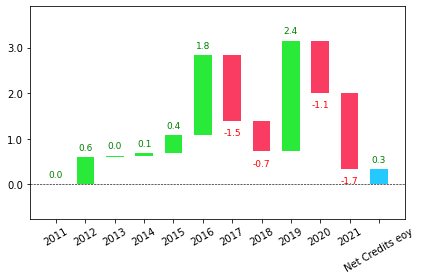

In [116]:
waterfall_chart.plot(issuance_year_list, credit_supply_list,
                     net_label='Net Credits eoy')

Hmmm, interesting, in the last few years, they have been spending their inventory of Verra Credits. This could be due to the new Corsia regs

 ------
 
 This information might be difficult to find with the given dataset

# MOVING TO LOOK AT DELTA'S CREDIT BREAKDOWN BY YEAR

### Reset Verra DF and Clean It

In [117]:
verra_df = pd.read_csv('../Data/VCU_Registry_Result_V2_5.2.22.csv',
                      parse_dates = ['Issuance Date', 'Retirement/Cancellation Date', 'Vintage Start', 'Vintage End'])

In [118]:
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details
0,2022-04-29,NaN,2020-01-11,2020-12-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,663,663,12990-464677897-464678559-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
1,2022-04-29,NaN,2021-01-01,2021-08-31,682,"Wind Power Project at Anthiyur, Tamil Nadu",India,Energy industries (renewable/non-renewable sou...,AMS-I.D.,22486,22486,12991-464678560-464701045-VCS-VCU-997-VER-IN-1...,NaN,NaT,NaN,NaN,NaN
2,2022-04-29,NaN,2020-08-28,2020-12-31,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,4773,4773,12992-464701046-464705818-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
3,2022-04-29,NaN,2021-01-01,2021-09-30,1319,Small-Scale Hydropower Project Sahanivotry In ...,Madagascar,Energy industries (renewable/non-renewable sou...,ACM0002,20747,20747,12993-464705819-464726565-VCS-VCU-997-VER-MG-1...,NaN,NaT,NaN,NaN,NaN
4,2022-04-29,NaN,2016-01-01,2016-12-31,1408,Chyulu Hills REDD+ Project,Kenya,Agriculture Forestry and Other Land Use,VM0009,617707,70000,12994-464726566-464796565-VCS-VCU-263-VER-KE-1...,CCB-Biodiversity Gold; CCB-Climate Gold; CCB-C...,NaT,NaN,NaN,NaN


First, cleaning column names

In [119]:
#getting rid of spaces and slashes
verra_df.columns = verra_df.columns.str.replace("\/| |\.", '_', regex = True)
verra_df.columns = verra_df.columns.str.lower()

In [120]:
verra_df.columns

Index(['issuance_date', 'sustainable_development_goals', 'vintage_start',
       'vintage_end', 'id', 'name', 'country', 'project_type', 'methodology',
       'total_vintage_quantity', 'quantity_issued', 'serial_number',
       'additional_certifications', 'retirement_cancellation_date',
       'retirement_beneficiary', 'retirement_reason', 'retirement_details'],
      dtype='object')

In [121]:
verra_df = verra_df.loc[verra_df['quantity_issued'].notnull()]

In [122]:
verra_df.sort_values(by='quantity_issued',
                    ascending=False,
                    inplace=True)

In [123]:
verra_df['issuance_year'] = pd.DatetimeIndex(verra_df['issuance_date']).year
verra_df['retirement_year'] = pd.DatetimeIndex(verra_df['retirement_cancellation_date']).year

In [124]:
verra_df['retirement_beneficiary'] = verra_df['retirement_beneficiary'].str.lower()

Now that all strings in beneficiary are lowercase, let's get rid of null values in the retirement column and then filter to only rows containing "delta" to try and pull only delta data

In [125]:
verra_df = verra_df.loc[verra_df['retirement_beneficiary'].notnull()]

In [126]:
issuance_by_year = verra_df[verra_df['retirement_beneficiary'].str.contains('delta')]

In [127]:
issuance_by_year['project_type'].value_counts()

Agriculture Forestry and Other Land Use                                          148
Energy industries (renewable/non-renewable sources)                              131
Energy industries (renewable/non-renewable sources); Manufacturing industries     16
Livestock, enteric fermentation, and manure management                             8
Name: project_type, dtype: int64

In [128]:
issuance_by_year['quantity_issued'].sum()

12728482

### With a clean dataframe of delta credits, create a new dataframe with the sum of credits by type

First create a new dataframe of just project type, quantity issued, and retirement year for analysis

In [158]:
delta_df = issuance_by_year[['project_type', 'retirement_year','quantity_issued']]

In [159]:
proj_list = list(issuance_by_year['project_type'].str.split(';'))

In [160]:
type(proj_list)

list

Updating a final list that only includes unique project types

In [161]:
proj_list_final = []    

for i in proj_list:
    for proj in i:
        if proj in proj_list_final:
            continue
        else:
            proj_list_final.append(proj)

In [162]:
len(proj_list_final)

4

In [163]:
proj_list_final

['Agriculture Forestry and Other Land Use',
 'Energy industries (renewable/non-renewable sources)',
 ' Manufacturing industries',
 'Livestock, enteric fermentation, and manure management']

In [164]:
typedict= {
    'Agriculture Forestry and Other Land Use':'AFOLU',
    'Livestock, enteric fermentation, and manure management':'Other nature-based sequestration, avoidance, or reduction',
    'Energy industries (renewable/non-renewable sources)':'renewable/non-renewable offsets',
    'Energy industries (renewable/non-renewable sources); Manufacturing industries':'renewable/non-renewable offsets',
}

# Now Update the Project type column using above dictionary

In [165]:
delta_df.head(2)

,project_type,retirement_year,quantity_issued
52750,Agriculture Forestry and Other Land Use,2021.0,900000
68580,Energy industries (renewable/non-renewable sou...,2017.0,791250


In [167]:
delta_df.project_type.value_counts()

Agriculture Forestry and Other Land Use                                          148
Energy industries (renewable/non-renewable sources)                              131
Energy industries (renewable/non-renewable sources); Manufacturing industries     16
Livestock, enteric fermentation, and manure management                             8
Name: project_type, dtype: int64

In [168]:
delta_df['project_type'] = delta_df['project_type'].map(typedict)

<ipython-input-168-8190186128a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_df['project_type'] = delta_df['project_type'].map(typedict)


In [169]:
delta_df.project_type.value_counts()

AFOLU                                                        148
renewable/non-renewable offsets                              147
Other nature-based sequestration, avoidance, or reduction      8
Name: project_type, dtype: int64

In [171]:
delta_df.head()

,project_type,retirement_year,quantity_issued
52750,AFOLU,2021.0,900000
68580,renewable/non-renewable offsets,2017.0,791250
114747,renewable/non-renewable offsets,2015.0,450000
30213,AFOLU,2021.0,402793
49526,renewable/non-renewable offsets,2019.0,400000


In [191]:
#group by both year and type so that all credits of that type are summed up for a given
#company
delta_df_1 = delta_df.groupby(['retirement_year', 'project_type']).sum()

In [192]:
#sort list to see largest companies/types of credits
delta_df_1.sort_values(by='quantity_issued',
                 ascending=False,
                 inplace=True)


In [193]:
delta_df_1.reset_index(inplace=True)
delta_df_1.head()

,retirement_year,project_type,quantity_issued
0,2019.0,renewable/non-renewable offsets,2772427
1,2021.0,AFOLU,2208552
2,2017.0,renewable/non-renewable offsets,2201506
3,2018.0,renewable/non-renewable offsets,1688639
4,2020.0,renewable/non-renewable offsets,1504500


In [194]:
delta_f = delta_df_1.pivot(index='retirement_year', columns='project_type', values='quantity_issued')
delta_f

project_type,AFOLU,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
retirement_year,,,
2014.0,NaN,NaN,34.0
2015.0,NaN,NaN,484000.0
2017.0,13662.0,166073.0,2201506.0
2018.0,681006.0,NaN,1688639.0
2019.0,173246.0,NaN,2772427.0
2020.0,211645.0,NaN,1504500.0
2021.0,2208552.0,NaN,295759.0
2022.0,NaN,NaN,327433.0


In [195]:
delta_f = delta_f.fillna(0)
delta_f.reset_index(inplace=True)

delta_f.head()

project_type,retirement_year,AFOLU,"Other nature-based sequestration, avoidance, or reduction",renewable/non-renewable offsets
0,2014.0,0.0,0.0,34.0
1,2015.0,0.0,0.0,484000.0
2,2017.0,13662.0,166073.0,2201506.0
3,2018.0,681006.0,0.0,1688639.0
4,2019.0,173246.0,0.0,2772427.0


<ipython-input-204-6a2269d9593f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(ylabels)


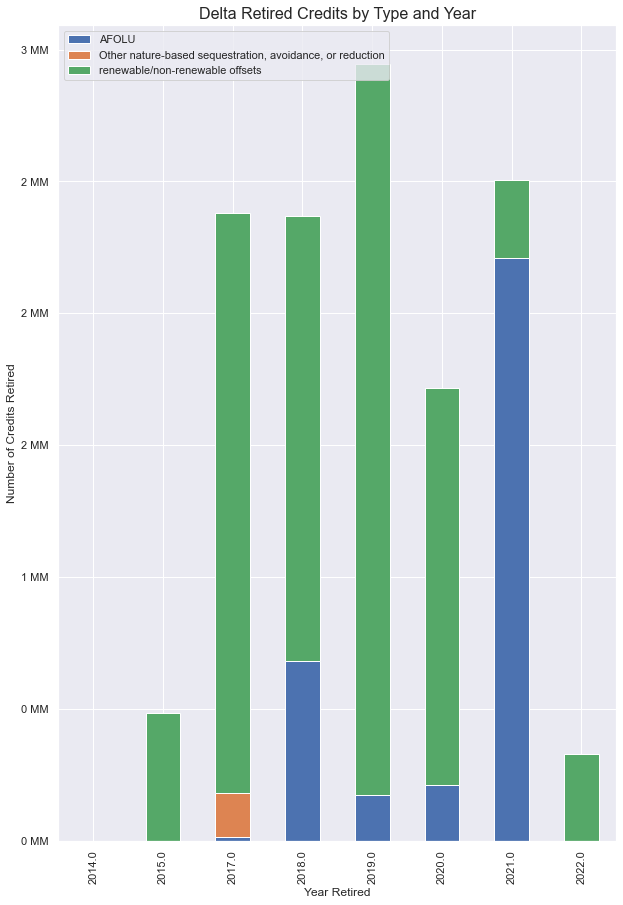

In [204]:
sns.set(style="darkgrid")

sns.color_palette("rocket")

sns.set(rc = {'figure.figsize':(10,15)})

#create stacked bar chart
plot = delta_f.set_index('retirement_year').plot(kind='bar', stacked=True)

#add overall title
plt.title('Delta Retired Credits by Type and Year', fontsize=16)

#update y axis from scientific notation
plot.ticklabel_format(style='plain', scilimits=(0,20), axis='y')
ylabels = ['{:,.0f}'.format(y) + ' MM' for y in plot.get_yticks()/1000000]
plot.set_yticklabels(ylabels)

#add axis titles
plt.xlabel('Year Retired')
plt.ylabel('Number of Credits Retired')
plt.legend(loc='upper left')